# Air Quality Prediction

# Business Understanding / Background

The Ministry of Environment, Forest and Climate Change (MoEFCC) in India is the nodal body which serves in the Central Government’s administrative structure for the planning, promotion, coordination and oversight of the implementation of the country’s  environmental and forestry policies and programs. The Ministry also acts as the country’s nodal body for the South East Asia Cooperative Environment Programme (SACEP), United Nations Environment Programme (UNEP), International Center for Integrated Mountain Development (ICIMOD) and the follow-up of the United Nations Conference on Environment and Development (UNCED). The Ministry is also in charged with dealing with environmental issues involving regional bodies such as the South Asian Association for Regional Cooperation (SAARC) and Economic and Social Council for Asia and Pacific (ESCAP) as well as multilateral organisations like Global Environment Facility (GEF) and Commission on Sustainable Development (CSD). One of their broad objectives is to prevent and maintain control of pollution. (Ministry of Environment, Forest and Climate Change, 2020) 
 
Central Pollution Control Board (CPCB) is an legal organisation that was established in September 1974 in India under the Water Act. In 1981, The Air (Prevention and Control of Pollution) Act of 1981 also gave the CPCB authority and responsibilities. It carries out the responsibilities of a field formation. It also offers technical support to the Ministry of Environment and Forests in compliance with the 1986 Environment (Protection) Act. According to the Air (Prevention and Control of Pollution) Act of 1981 and Water (Prevention and Control of Pollution) Act of 1974, CPCB promotes cleanliness of streams by controlling, preventing and decreasing water pollution. Not only that, CPCB also improves the quality of air in India by controlling, preventing and decreasing air pollution. 
 
Air quality monitoring is an important strategy to apply in air quality management in India. CPCB established the National Air Monitoring Programme (NAMP) to analyze the air quality status. They also try to control and reduce the air pollution from various factor such as industries in India. In addition, it also offers the background of the air quality data needed for the industrial and town planning. Moreover, CPCB has an automatic monitoring state in New Delhi. This station is responsible for monitoring Respirable Suspended Particulate Matter (RSPM), Carbon Monoxide (CO), Ozone (O3), Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2) and Suspended Particulate Matter (SPM) regularly. (Cpcb.nic.in, 2019)

# Data Understanding

## Import Necessary Library

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
import sklearn.metrics as sm
from sklearn.metrics import classification_report
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')
from statistics import mean, median, mode, stdev

import warnings 
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
#Load dataset into the dataframe (from years 1987 - 2015)
#aq = Air Quality
aq = pd.read_csv("D:/University Stuff/Year3/BACS3013 Data Science/data.csv", encoding="ISO-8859-1")

#View sample of file
aq.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1/2/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1/2/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1/2/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1/3/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1/3/1990


In [3]:
print("There are {} rows and {} features in this dataset.".format(aq.shape[0], aq.shape[1]))

There are 435742 rows and 13 features in this dataset.


In [4]:
#Identify the datatype of each column
print(aq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

From the code above, we can identify which data is categorical or numerical.

Categorical data:
Station Code (stn_code), Sampling Date, State, Location, Agency, Type, Location Monitoring Station, Date

Numerical data:
Sulphur Dioxide (so2), Nitrogen Dioxide (no2), Respiratory Suspended Particulate Matter (rspm), Suspended Particulate Matter(spm), PSI 2.5 (pm2_5)

It can also be seen that out of every column, only the state column has 0 null values while the pm2_5 column has the most null values, which is 97.86% of all entries.

In [5]:
#Map
#Load the GeoDataFrame
fp = r'Maps_with_python-master\india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<AxesSubplot:>

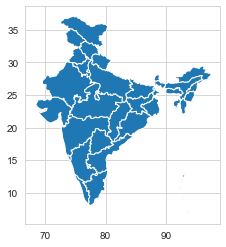

In [6]:
#Plotting the map of India
map_df.plot()

In [7]:
print("Number of records for all ", aq['state'].nunique(), " states: ")
print()
state_df = pd.DataFrame(aq['state'].value_counts().rename_axis('State').reset_index(name = 'Count'))
print(state_df)

Number of records for all  37  states: 

                          State  Count
0                   Maharashtra  60384
1                 Uttar Pradesh  42816
2                Andhra Pradesh  26368
3                        Punjab  25634
4                     Rajasthan  25589
5                        Kerala  24728
6              Himachal Pradesh  22896
7                   West Bengal  22463
8                       Gujarat  21279
9                    Tamil Nadu  20597
10               Madhya Pradesh  19920
11                        Assam  19361
12                       Odisha  19279
13                    Karnataka  17119
14                        Delhi   8551
15                   Chandigarh   8520
16                 Chhattisgarh   7831
17                          Goa   6206
18                    Jharkhand   5968
19                      Mizoram   5338
20                    Telangana   3978
21                    Meghalaya   3853
22                   Puducherry   3785
23                     

The figure above shows the number of values for every state. Maharashtra has the highest value which is 60384 rows. 

In [8]:
#Cleaning the map dataset
map_df['st_nm'].replace("Andaman and Nicobar Islands", "andaman-and-nicobar-islands", inplace = True)
map_df['st_nm'].replace("Dadra and Nagar Haveli", "Dadra & Nagar Haveli", inplace = True)
map_df['st_nm'].replace("Daman and Diu", "Daman & Diu", inplace = True)
map_df['st_nm'].replace("Jammu and Kashmir", "Jammu & Kashmir", inplace = True)

In [9]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_df.set_index('State'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged

,id,geometry,Count
st_nm,,,
andaman-and-nicobar-islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",1.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",90.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",19361.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",2275.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",8520.0
Chhattisgarh,None,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",7831.0
Dadra & Nagar Haveli,None,"POLYGON ((73.20640 20.12165, 73.20865 20.10695...",634.0
Daman & Diu,None,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",782.0
Goa,None,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",6206.0


<AxesSubplot:title={'center':'Number of Records in India by State'}>

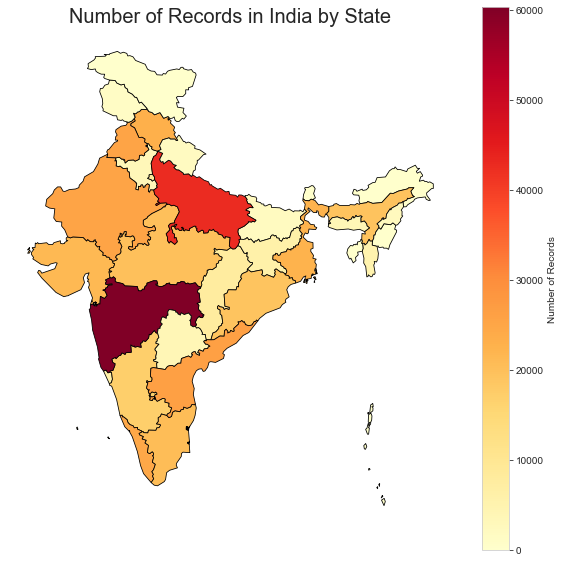

In [10]:
#Create map
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of Records in India by State', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Records"})

### Descriptive Analysis 

Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data.

In [11]:
aq.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


### Box Plot

<AxesSubplot:xlabel='so2'>

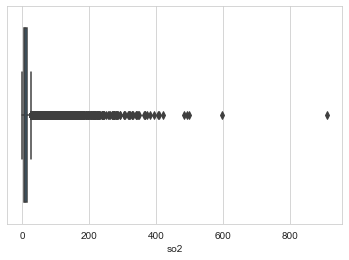

In [12]:
sns.boxplot(x=aq['so2'])

<AxesSubplot:xlabel='no2'>

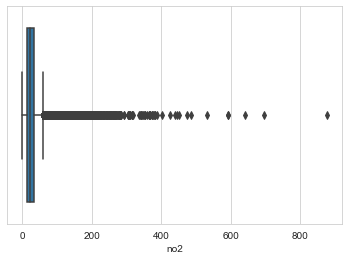

In [13]:
sns.boxplot(x=aq['no2'])

<AxesSubplot:xlabel='rspm'>

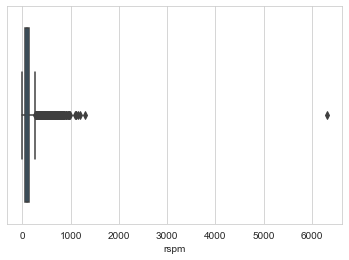

In [14]:
sns.boxplot(x=aq['rspm'])

<AxesSubplot:xlabel='spm'>

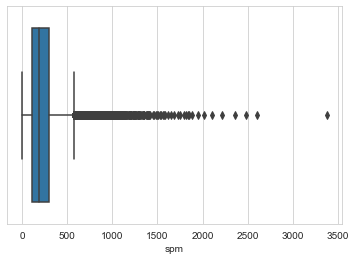

In [15]:
sns.boxplot(x=aq['spm'])

<AxesSubplot:xlabel='pm2_5'>

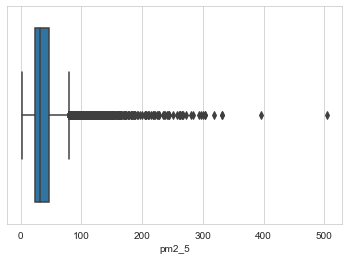

In [16]:
sns.boxplot(x=aq['pm2_5'])

In [17]:
#Extracting Maharashtra data to analyse
maq = aq.query('state=="Maharashtra" ')
maq.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
197237,53.0,5/2/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,NaN,NaN,10.4,NaN,NaN,NaN,NaN,5/2/1987
197238,52.0,5/3/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Industrial,18.2,35.8,NaN,NaN,NaN,NaN,5/3/1987
197239,52.0,6/2/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Industrial,11.3,16.3,NaN,NaN,NaN,NaN,6/2/1987
197240,54.0,16/6/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Residential,NaN,9.2,NaN,NaN,NaN,NaN,16/6/1987
197241,53.0,6/3/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,NaN,8.8,7.7,NaN,NaN,NaN,NaN,6/3/1987


In [18]:
print("There are {} rows and {} features in the Maharashtra dataset.".format(maq.shape[0], maq.shape[1]))

There are 60384 rows and 13 features in the Maharashtra dataset.


We have decided to choose the state Maharashtra to perform an analysis on as consists of the most records out of all 37 states (13.86%).

In [19]:
print("Number of null values found:")
print()
print(maq.isnull().sum())

Number of null values found:

stn_code                       17408
sampling_date                      0
state                              0
location                           0
agency                         18689
type                             294
so2                             2062
no2                             1217
rspm                            4945
spm                            38039
location_monitoring_station     2855
pm2_5                          60384
date                               2
dtype: int64


We can see from the information above, all of the values in pm2_5 are null values. So this column can be removed along with other unneccessary data.

# Data Preparation

In [20]:
maq.drop(labels=['stn_code', 'sampling_date', 'agency', 'location_monitoring_station', 'pm2_5'], axis = 1, inplace = True) #axis = 1 means columns, inplace means replace the data in place
maq.head()

,state,location,type,so2,no2,rspm,spm,date
197237,Maharashtra,Pune,NaN,NaN,10.4,NaN,NaN,5/2/1987
197238,Maharashtra,Pune,Industrial,18.2,35.8,NaN,NaN,5/3/1987
197239,Maharashtra,Pune,Industrial,11.3,16.3,NaN,NaN,6/2/1987
197240,Maharashtra,Pune,Residential,NaN,9.2,NaN,NaN,16/6/1987
197241,Maharashtra,Pune,NaN,8.8,7.7,NaN,NaN,6/3/1987


We removed some unnecessary data which are Station Code(stn_code), Sampling Date Agency and Location Monitoring Station. pm2_5 is omitted as well since it has 100% of its data missing. Since there are still missing values in the new dataset, we have to fill the missing values, by first sorting the values in chronological order.

In [21]:
#To sort based on dates, the column date should have the datatype “datetime”。
maq['date'] = pd.to_datetime(maq.date, format='%d/%m/%Y') #If cannnot work, need to change to "%Y-%m-%d"
maq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60384 entries, 197237 to 257620
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     60384 non-null  object        
 1   location  60384 non-null  object        
 2   type      60090 non-null  object        
 3   so2       58322 non-null  float64       
 4   no2       59167 non-null  float64       
 5   rspm      55439 non-null  float64       
 6   spm       22345 non-null  float64       
 7   date      60382 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 4.1+ MB


In [22]:
maq.sort_values(by='date')

,state,location,type,so2,no2,rspm,spm,date
197243,Maharashtra,Pune,Residential,8.1,9.0,NaN,NaN,1987-01-07
197244,Maharashtra,Pune,Residential,0.7,47.6,NaN,293.0,1987-01-12
197237,Maharashtra,Pune,NaN,NaN,10.4,NaN,NaN,1987-02-05
197239,Maharashtra,Pune,Industrial,11.3,16.3,NaN,NaN,1987-02-06
197242,Maharashtra,Pune,Industrial,9.7,10.9,NaN,NaN,1987-02-07
...,...,...,...,...,...,...,...,...
252109,Maharashtra,Thane,"Residential, Rural and other Areas",22.0,63.0,115.0,NaN,2015-12-31
255060,Maharashtra,Chandrapur,"Residential, Rural and other Areas",4.0,16.0,155.0,NaN,2015-12-31
257620,Maharashtra,Nagpur,"Residential, Rural and other Areas",12.0,38.0,51.0,NaN,2015-12-31
245191,Maharashtra,Chandrapur,Industrial Area,11.0,25.0,80.0,NaN,NaT


In [23]:
#Check for unknown values
maq.isnull().sum()

state           0
location        0
type          294
so2          2062
no2          1217
rspm         4945
spm         38039
date            2
dtype: int64

In [24]:
#Create variables to store number of replaced / removed rows
replaced = 0
removed = 0
ttl = 0
remained = 0

ttl = maq['type'].isnull().sum() + maq['so2'].isnull().sum() + maq['no2'].isnull().sum() + maq['rspm'].isnull().sum() + maq['spm'].isnull().sum() + maq['date'].isnull().sum()
print("Total unknown values: ", ttl)
print("Total replaced unknown values: ", replaced)
print("Total removed unknown values : ", removed)

Total unknown values:  46559
Total replaced unknown values:  0
Total removed unknown values :  0


In [25]:
#Fill the null values with the forward fill method
maq['so2'].fillna(method='ffill',inplace = True);
maq['no2'].fillna(method='ffill',inplace = True);
maq['rspm'].fillna(method='ffill',inplace = True);
maq['spm'].fillna(method='ffill',inplace = True);

In [26]:
#Check for null values again
maq.isnull().sum()

state          0
location       0
type         294
so2            1
no2            0
rspm        2855
spm            7
date           2
dtype: int64

Even after filling the null values with the forward fill method, there are still 2855 missing values in rspm, 1 missing value in so2, 7 missing value in spm and 2 missing values in date.

In [27]:
remained = maq['type'].isnull().sum() + maq['so2'].isnull().sum() + maq['no2'].isnull().sum() + maq['rspm'].isnull().sum() + maq['spm'].isnull().sum() + maq['date'].isnull().sum()

replaced = replaced + (ttl - remained)
print("Total replaced unknown values: ", replaced)
print("Total removed unknown values : ", removed)

Total replaced unknown values:  43400
Total removed unknown values :  0


In [28]:
print(maq.iloc[[2853]],maq.iloc[[2854]],maq.iloc[[2855]],maq.iloc[[2856]])

              state location                                type  so2   no2  \
200090  Maharashtra   Nagpur  Residential, Rural and other Areas  6.0  30.0   

        rspm    spm       date  
200090   NaN  106.0 2003-12-22                 state location                                type  so2   no2  \
200091  Maharashtra   Nagpur  Residential, Rural and other Areas  6.0  25.0   

        rspm    spm       date  
200091   NaN  108.0 2003-12-29                 state location                                type   so2   no2  \
200092  Maharashtra   Nashik  Residential, Rural and other Areas  42.0  28.0   

        rspm    spm       date  
200092  93.0  181.0 2004-02-01                 state location                                type   so2   no2  \
200093  Maharashtra   Nashik  Residential, Rural and other Areas  39.0  28.0   

         rspm    spm       date  
200093  110.0  178.0 2004-06-01  


This shows that rspm has not been calculated till 2003. It was only measured starting from 2004 onwards. We will omit the column of rspm for simplicity.

In [29]:
maq.drop(labels = ['rspm'], axis = 1, inplace = True)
maq.head()

,state,location,type,so2,no2,spm,date
197237,Maharashtra,Pune,NaN,NaN,10.4,NaN,1987-02-05
197238,Maharashtra,Pune,Industrial,18.2,35.8,NaN,1987-03-05
197239,Maharashtra,Pune,Industrial,11.3,16.3,NaN,1987-02-06
197240,Maharashtra,Pune,Residential,11.3,9.2,NaN,1987-06-16
197241,Maharashtra,Pune,NaN,8.8,7.7,NaN,1987-03-06


In [30]:
#Check for null values again
maq.isnull().sum()

state         0
location      0
type        294
so2           1
no2           0
spm           7
date          2
dtype: int64

In [31]:
temp = remained
remained = maq['type'].isnull().sum() + maq['so2'].isnull().sum() + maq['no2'].isnull().sum() + maq['spm'].isnull().sum() + maq['date'].isnull().sum()

removed = removed + (temp - remained)
print("Total replaced unknown values: ", replaced)
print("Total removed unknown values : ", removed)

Total replaced unknown values:  43400
Total removed unknown values :  2855


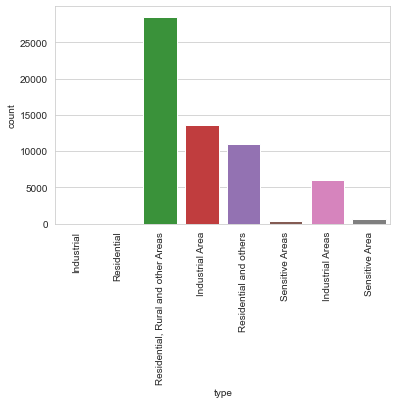

In [32]:
#Dealing with the 294 missing values of type
ty = sns.countplot(x='type', data = maq)
ty.set_xticklabels(ty.get_xticklabels(), rotation=90); #Put ';' to remove the additional information before graph

The graph shows that we have repetitions of types, we will replace all of them into unique types.

In [33]:
maq['type'].replace("Industrial Areas", "Industrial", inplace = True)
maq['type'].replace("Industrial Area", "Industrial", inplace = True)
maq['type'].replace("Residential and others","Residential", inplace = True)
maq['type'].replace("Residential, Rural and other Areas","Residential", inplace = True)
maq['type'].replace("Sensitive Areas", "Sensitive", inplace = True)
maq['type'].replace("Sensitive Area", "Sensitive", inplace = True)

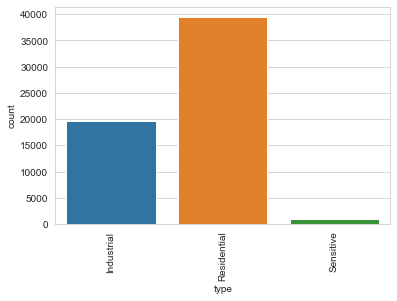

In [34]:
#Display the new graph
ty = sns.countplot(x='type', data = maq)
ty.set_xticklabels(ty.get_xticklabels(), rotation=90);

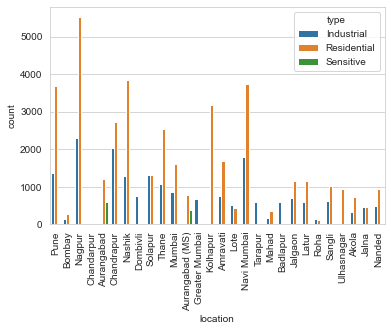

In [35]:
#Show the type based on city
datacount_maq =sns.countplot(x ="location",hue = 'type',data = maq);
datacount_maq.set_xticklabels(datacount_maq.get_xticklabels(), rotation=90);

In [36]:
maq['type'].mode()

0    Residential
Name: type, dtype: object

Since "Residential" is the mode of the data, the missing values will be replaced with "Residential".

In [37]:
maq['type'] = maq['type'].replace(np.nan, "Residential")

In [38]:
#Check for null values again
maq.isnull().sum()

state       0
location    0
type        0
so2         1
no2         0
spm         7
date        2
dtype: int64

For the missing values of s02, spm and date, we will omit these few rows of data. 

In [39]:
temp = remained
remained = maq['type'].isnull().sum() + maq['so2'].isnull().sum() + maq['no2'].isnull().sum() + maq['spm'].isnull().sum() + maq['date'].isnull().sum()

replaced = replaced + (temp - remained)
print("Total replaced unknown values: ", replaced)
print("Total removed unknown values : ", removed)

Total replaced unknown values:  43694
Total removed unknown values :  2855


In [40]:
maq.dropna(how='any', inplace=True) #If didn't add these documents, will return new DataFrame

In [41]:
maq.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
spm         0
date        0
dtype: int64

In [42]:
temp = remained
remained = maq['type'].isnull().sum() + maq['so2'].isnull().sum() + maq['no2'].isnull().sum() + maq['spm'].isnull().sum() + maq['date'].isnull().sum()

removed = removed + (temp - remained)
print("Total replaced unknown values: ", replaced)
print("Total removed unknown values : ", removed)

Total replaced unknown values:  43694
Total removed unknown values :  2865


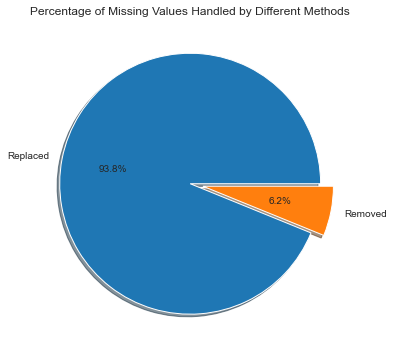

In [43]:
# Statistic to show the solution for missing values
method = ['Replaced', 'Removed']
count = [replaced, removed]

# Create pie chart
explode = (0, 0.1)
plt.figure(figsize=(6,6));
plt.pie(count, explode=explode, labels=method, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of Missing Values Handled by Different Methods")
plt.show()

In [44]:
maq.head(15)

,state,location,type,so2,no2,spm,date
197244,Maharashtra,Pune,Residential,0.7,47.6,293.0,1987-01-12
197245,Maharashtra,Pune,Industrial,1.1,32.7,206.0,1987-02-12
197246,Maharashtra,Pune,Residential,1.8,28.9,271.0,1988-01-01
197247,Maharashtra,Pune,Industrial,7.1,58.0,252.0,1988-02-01
197248,Maharashtra,Pune,Residential,0.7,20.5,229.0,1988-01-02
197249,Maharashtra,Pune,Industrial,12.2,60.7,213.0,1988-02-02
197250,Maharashtra,Pune,Residential,1.7,14.9,232.0,1988-02-03
197251,Maharashtra,Pune,Industrial,8.5,47.6,259.0,1988-01-03
197252,Maharashtra,Pune,Residential,2.1,13.0,185.0,1988-01-04
197253,Maharashtra,Pune,Industrial,4.1,15.7,187.0,1988-02-04


In [45]:
#Convert date to float
maq['date_float'] = (maq['date'] - maq['date'].min()) / np.timedelta64(1, 'D')
maq.head()

,state,location,type,so2,no2,spm,date,date_float
197244,Maharashtra,Pune,Residential,0.7,47.6,293.0,1987-01-12,0.0
197245,Maharashtra,Pune,Industrial,1.1,32.7,206.0,1987-02-12,31.0
197246,Maharashtra,Pune,Residential,1.8,28.9,271.0,1988-01-01,354.0
197247,Maharashtra,Pune,Industrial,7.1,58.0,252.0,1988-02-01,385.0
197248,Maharashtra,Pune,Residential,0.7,20.5,229.0,1988-01-02,355.0


# Data Visualization 

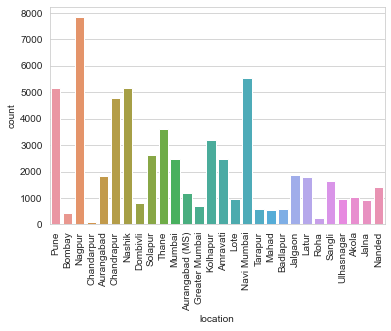

In [46]:
datacount = sns.countplot(x ="location",data = maq);
datacount.set_xticklabels(datacount.get_xticklabels(), rotation=90);

In [47]:
loc = pd.pivot_table(maq, values=['so2','no2','spm'],index='location') 
loc

,no2,so2,spm
location,,,
Akola,9.357824,7.937023,134.000000
Amravati,13.363070,11.138559,120.666531
Aurangabad,32.986538,9.961356,144.928853
Aurangabad (MS),20.769048,6.371769,224.919643
Badlapur,64.451282,27.403419,135.169231
Bombay,30.061229,21.169740,239.732861
Chandarpur,27.319481,16.414286,168.818182
Chandrapur,29.354937,19.798243,188.754603
Dombivli,60.524426,31.895526,136.499395


Text(0.5, 1.0, 'Top 10 Locations with Highest so2 Value')

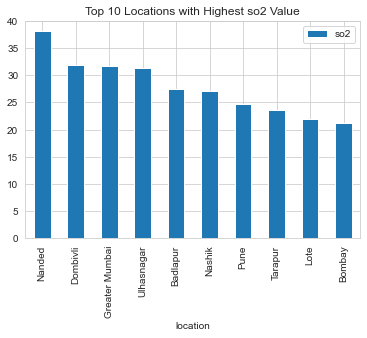

In [48]:
#Top 10 Locations with Highest so2 Value
maxso2 = loc.sort_values(by='so2',ascending=False)
maxso2.loc[:,['so2']].head(10).plot(kind='bar'); # Based on average values
plt.title("Top 10 Locations with Highest so2 Value")

From the bar chart above, we can observe the highest sulfur dioxide (so2) in the location of Nanded and the minimum sulfur dioxide (so2) in the location of Bombay 

Text(0.5, 1.0, 'Top 10 Locations with Highest no2 Value')

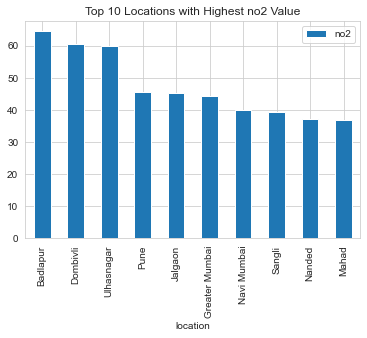

In [49]:
#Top 10 Locations with Highest no2 Value
maxno2 = loc.sort_values(by='no2',ascending=False);
maxno2.loc[:,['no2']].head(10).plot(kind='bar');
plt.title("Top 10 Locations with Highest no2 Value")

From the bar chart above, we can observe the highest nitrogen dioxide (no2) in the location of Badlapur and the minimum nitrogen dioxide (no2) in the location of Mahad 

Text(0.5, 1.0, 'Top 10 Locations with Highest spm Value')

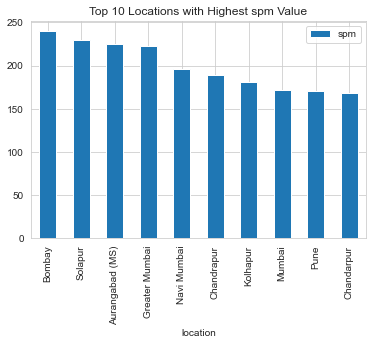

In [50]:
#Top 10 Locations with Highest spm Value
maxspm = loc.sort_values(by='spm',ascending=False);
maxspm.loc[:,['spm']].head(10).plot(kind='bar');
plt.title("Top 10 Locations with Highest spm Value")

From the bar chart above, we can observe the highest Suspended particulate matter (spm) in the location of Bombay and the minimum Suspended particulate matter (spm) in the location of Chandarpur

## Calculating Air Quality Index (AQI) 

In [51]:
#Split into six categories based on the range of so2 value
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= "s1"
    if (so2>40 and so2<=80):
     si= "s2"
    if (so2>80 and so2<=380):
     si= "s3"
    if (so2>380 and so2<=800):
     si= "s4"
    if (so2>800 and so2<=1600):
     si= "s5"
    if (so2>1600):
     si= "s6"
    return si

maq['si']=maq['so2'].apply(calculate_si)
ds= maq[['so2','si']]
ds.tail()

,so2,si
257616,12.0,s1
257617,15.0,s1
257618,11.0,s1
257619,12.0,s1
257620,12.0,s1


In [52]:
#Split into six categories based on the range of no2 value
def calculate_ni(no2):
    ni=0
    if (no2<=40):
     ni= "n1"
    if (no2>40 and no2<=80):
     ni= "n2"
    if (no2>80 and no2<=180):
     ni= "n3"
    if (no2>180 and no2<=280):
     ni= "n4"
    if (no2>280 and no2<=400):
     ni= "n5"
    if (no2>400):
     ni= "n6"
    return ni

maq['ni']=maq['no2'].apply(calculate_ni)
dn= maq[['no2','ni']]
dn.tail()

,no2,ni
257616,48.0,n2
257617,63.0,n2
257618,33.0,n1
257619,38.0,n1
257620,38.0,n1


In [53]:
#Split into six categories based on the range of spm value
def calculate_spi(spm):
    spi=0
    if (spm<=40):
      spi= "sp1"
    if (spm>40 and spm<=80):
      spi= "sp2"
    if (spm>80 and spm<=180):
      spi= "sp3"
    if (spm>180 and spm<=280):
      spi= "sp4"
    if (spm>280 and spm<=400):
      spi= "sp5"
    if (spm>400):
      spi= "sp6"
    return  spi

maq['spi']=maq['spm'].apply(calculate_spi)
dsp= maq[['spm','spi']]
dsp.tail()

,spm,spi
257616,134.0,sp3
257617,134.0,sp3
257618,134.0,sp3
257619,134.0,sp3
257620,134.0,sp3


In [54]:
maq.sample(2)

,state,location,type,so2,no2,spm,date,date_float,si,ni,spi
206816,Maharashtra,Thane,Industrial,9.0,11.3,145.0,2006-06-13,7092.0,s1,n1,sp3
216241,Maharashtra,Kolhapur,Residential,8.8,11.8,245.0,2009-11-02,8330.0,s1,n1,sp4


In [55]:
# AQI
def calculate_aqi(si,ni,spi):
    aqi=0
    if(si>ni and si>spi):
     aqi=si
    if (spi>ni and spi>si):
     aqi=spi
    if(ni>si and ni>spi):
     aqi= ni
    return aqi

maq['AQI']=maq.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']), axis=1)

In [56]:
maq

,state,location,type,so2,no2,spm,date,date_float,si,ni,spi,AQI
197244,Maharashtra,Pune,Residential,0.7,47.6,293.0,1987-01-12,0.0,s1,n2,sp5,293.0
197245,Maharashtra,Pune,Industrial,1.1,32.7,206.0,1987-02-12,31.0,s1,n1,sp4,206.0
197246,Maharashtra,Pune,Residential,1.8,28.9,271.0,1988-01-01,354.0,s1,n1,sp4,271.0
197247,Maharashtra,Pune,Industrial,7.1,58.0,252.0,1988-02-01,385.0,s1,n2,sp4,252.0
197248,Maharashtra,Pune,Residential,0.7,20.5,229.0,1988-01-02,355.0,s1,n1,sp4,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257616,Maharashtra,Nagpur,Residential,12.0,48.0,134.0,2015-12-27,10576.0,s1,n2,sp3,134.0
257617,Maharashtra,Nagpur,Residential,15.0,63.0,134.0,2015-12-28,10577.0,s1,n2,sp3,134.0
257618,Maharashtra,Nagpur,Residential,11.0,33.0,134.0,2015-12-29,10578.0,s1,n1,sp3,134.0
257619,Maharashtra,Nagpur,Residential,12.0,38.0,134.0,2015-12-30,10579.0,s1,n1,sp3,134.0


In [57]:
aqChk = maq[['location', 'so2', 'no2', 'spm', 'AQI']]
aqChk

,location,so2,no2,spm,AQI
197244,Pune,0.7,47.6,293.0,293.0
197245,Pune,1.1,32.7,206.0,206.0
197246,Pune,1.8,28.9,271.0,271.0
197247,Pune,7.1,58.0,252.0,252.0
197248,Pune,0.7,20.5,229.0,229.0
...,...,...,...,...,...
257616,Nagpur,12.0,48.0,134.0,134.0
257617,Nagpur,15.0,63.0,134.0,134.0
257618,Nagpur,11.0,33.0,134.0,134.0
257619,Nagpur,12.0,38.0,134.0,134.0


In [58]:
aq_wise = pd.pivot_table(maq, values=['AQI'], index='location')
aq_wise

,AQI
location,
Akola,134.000000
Amravati,120.667345
Aurangabad,144.928853
Aurangabad (MS),224.954337
Badlapur,135.020513
Bombay,239.732861
Chandarpur,168.824675
Chandrapur,188.786862
Dombivli,137.598065


<AxesSubplot:xlabel='location'>

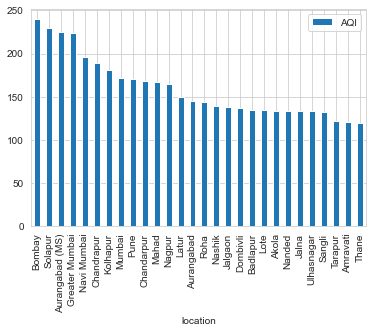

In [59]:
maxaqi = aq_wise.sort_values(by='AQI',ascending=False)
maxaqi.loc[:,['AQI']].head(37).plot(kind='bar')

From the graph given above, the maximum air quality index has been recorded around 240 in Bombay location. While, Thane has the minimum air quality index which is around 130. 

In [60]:
date_wise = pd.pivot_table(maq, values=['AQI'],index='date')
date_wise

,AQI
date,
1987-01-12,293.0
1987-02-12,206.0
1988-01-01,271.0
1988-01-02,229.0
1988-01-03,259.0
...,...
2015-12-27,134.0
2015-12-28,134.0
2015-12-29,134.0


Now, we can observe the changes of the air quality index for the whole Maharashtra from 1987 until 2015. Obviously, the AQI has been decreased from past. 

<AxesSubplot:xlabel='date'>

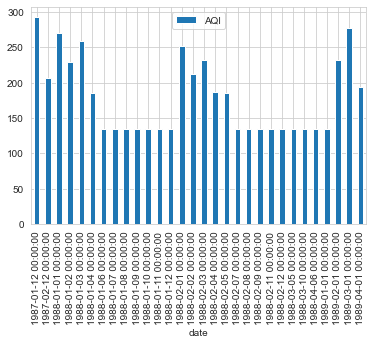

In [61]:
date_wise.loc[:,['AQI']].head(30).plot(kind='bar')

Now, we can see the graph shown in the first 30 rows in the time series. The AQI is going up and down in the 90s. 

In [62]:
# Highest and Lowest AQI based on the date
aqHL = maq
maxAq = aqHL.groupby('date').max()
minAq = aqHL.groupby('date').min()

maxAq.rename(columns = {'AQI':'Max AQI'}, inplace = True)
minAq.rename(columns = {'AQI':'Min AQI'}, inplace = True)


#Merge them together
minMaxAqi = pd.concat([minAq['Min AQI'], maxAq['Max AQI']], axis = 1)

In [63]:
minMaxAqi.head(50)

,Min AQI,Max AQI
date,,
1987-01-12,293.0,293.0
1987-02-12,206.0,206.0
1988-01-01,271.0,271.0
1988-01-02,229.0,229.0
1988-01-03,259.0,259.0
1988-01-04,185.0,185.0
1988-01-06,135.0,135.0
1988-01-07,135.0,135.0
1988-01-08,135.0,135.0


In [64]:
print(minMaxAqi.iloc[30:50])

            Min AQI  Max AQI
date                        
1989-05-01    181.0    197.0
1989-06-01    179.0    194.0
1989-09-01     95.0    231.0
1989-10-01     45.0    231.0
1989-12-01    269.0    347.0
1990-01-01    190.0    504.0
1990-02-01    182.0    348.0
1990-03-01    141.0    370.0
1990-04-01    187.0    394.0
1990-05-01     95.0    265.0
1990-06-01     97.0    282.0
1990-07-01     78.0    276.0
1990-08-01     64.0    157.0
1990-09-01     57.0    189.0
1990-10-01     82.0    287.0
1990-11-01    178.0    350.0
1990-12-01    160.0    381.0
1991-01-01    148.0    392.0
1991-02-01    175.0    447.0
1991-03-01     96.0    386.0


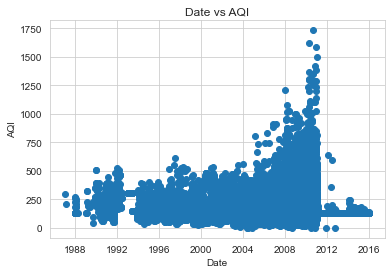

In [65]:
# Bivariate Analysis between date and AQI using ScatterPlot
plt.scatter(maq['date'], maq['AQI'])
plt.title('Date vs AQI')
plt.xlabel('Date')
plt.ylabel('AQI')

plt.show()

### Training Data 

In [66]:
dum1 = pd.get_dummies(maq['type'])
dum2 = pd.get_dummies(maq['location'])
maq['year'] = maq['date'].dt.year

In [67]:
maqd = pd.concat([maq, dum1, dum2], axis = 1)
maqd.head(20)

,state,location,type,so2,no2,spm,date,date_float,si,ni,...,Nanded,Nashik,Navi Mumbai,Pune,Roha,Sangli,Solapur,Tarapur,Thane,Ulhasnagar
197244,Maharashtra,Pune,Residential,0.7,47.6,293.0,1987-01-12,0.0,s1,n2,...,0,0,0,1,0,0,0,0,0,0
197245,Maharashtra,Pune,Industrial,1.1,32.7,206.0,1987-02-12,31.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0
197246,Maharashtra,Pune,Residential,1.8,28.9,271.0,1988-01-01,354.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0
197247,Maharashtra,Pune,Industrial,7.1,58.0,252.0,1988-02-01,385.0,s1,n2,...,0,0,0,1,0,0,0,0,0,0
197248,Maharashtra,Pune,Residential,0.7,20.5,229.0,1988-01-02,355.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0
197249,Maharashtra,Pune,Industrial,12.2,60.7,213.0,1988-02-02,386.0,s1,n2,...,0,0,0,1,0,0,0,0,0,0
197250,Maharashtra,Pune,Residential,1.7,14.9,232.0,1988-02-03,387.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0
197251,Maharashtra,Pune,Industrial,8.5,47.6,259.0,1988-01-03,356.0,s1,n2,...,0,0,0,1,0,0,0,0,0,0
197252,Maharashtra,Pune,Residential,2.1,13.0,185.0,1988-01-04,357.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0
197253,Maharashtra,Pune,Industrial,4.1,15.7,187.0,1988-02-04,388.0,s1,n1,...,0,0,0,1,0,0,0,0,0,0


In [68]:
maqd.drop(labels = ['state','location','type','so2','no2','spm','si','ni','spi', 'year'], axis = 1, inplace = True)
maqd.sample(2)

,date,date_float,AQI,Industrial,Residential,Sensitive,Akola,Amravati,Aurangabad,Aurangabad (MS),...,Nanded,Nashik,Navi Mumbai,Pune,Roha,Sangli,Solapur,Tarapur,Thane,Ulhasnagar
239202,2013-05-25,9630.0,134.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243381,2013-10-17,9775.0,134.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
#Find the pairwise correlation of all columns
maqd.corr()

,date_float,AQI,Industrial,Residential,Sensitive,Akola,Amravati,Aurangabad,Aurangabad (MS),Badlapur,...,Nanded,Nashik,Navi Mumbai,Pune,Roha,Sangli,Solapur,Tarapur,Thane,Ulhasnagar
date_float,1.000000,-0.263173,-0.051823,0.048042,0.011717,0.088241,0.025743,0.088505,-0.086904,0.055430,...,0.110734,-0.011244,0.041462,-0.046769,0.005510,0.104599,-0.061000,-0.074894,-0.067402,0.067807
AQI,-0.263173,1.000000,0.040169,-0.037555,-0.007901,-0.042952,-0.096899,-0.035867,0.096168,-0.030851,...,-0.050372,-0.079645,0.115835,0.025173,-0.013419,-0.056991,0.156289,-0.045540,-0.122524,-0.040879
Industrial,-0.051823,0.040169,1.000000,-0.963622,-0.089769,-0.003132,-0.006646,-0.122981,-0.097792,0.142562,...,0.003171,-0.048379,-0.000815,-0.041287,0.030301,0.018296,0.080936,0.143421,-0.013017,-0.087728
Residential,0.048042,-0.037555,-0.963622,1.000000,-0.179687,0.007708,0.013714,0.005263,0.002407,-0.137376,...,0.002280,0.058382,0.011842,0.051406,-0.027671,-0.012275,-0.072534,-0.138204,0.021626,0.091039
Sensitive,0.011717,-0.007901,-0.089769,-0.179687,1.000000,-0.017196,-0.026642,0.433036,0.350968,-0.012798,...,-0.020166,-0.039489,-0.041128,-0.039602,-0.008410,-0.021599,-0.027601,-0.012875,-0.032675,-0.016359
Akola,0.088241,-0.042952,-0.003132,0.007708,-0.017196,1.000000,-0.027369,-0.023558,-0.018733,-0.013147,...,-0.020716,-0.040566,-0.042250,-0.040682,-0.008639,-0.022188,-0.028353,-0.013226,-0.033567,-0.016805
Amravati,0.025743,-0.096899,-0.006646,0.013714,-0.026642,-0.027369,1.000000,-0.036499,-0.029024,-0.020369,...,-0.032097,-0.062851,-0.065460,-0.063031,-0.013385,-0.034377,-0.043929,-0.020492,-0.052006,-0.026036
Aurangabad,0.088505,-0.035867,-0.122981,0.005263,0.433036,-0.023558,-0.036499,1.000000,-0.024982,-0.017532,...,-0.027627,-0.054098,-0.056344,-0.054253,-0.011521,-0.029590,-0.037812,-0.017638,-0.044764,-0.022411
Aurangabad (MS),-0.086904,0.096168,-0.097792,0.002407,0.350968,-0.018733,-0.029024,-0.024982,1.000000,-0.013942,...,-0.021969,-0.043018,-0.044804,-0.043141,-0.009161,-0.023529,-0.030067,-0.014026,-0.035596,-0.017821
Badlapur,0.055430,-0.030851,0.142562,-0.137376,-0.012798,-0.013147,-0.020369,-0.017532,-0.013942,1.000000,...,-0.015418,-0.030190,-0.031444,-0.030277,-0.006429,-0.016513,-0.021101,-0.009843,-0.024981,-0.012507


<AxesSubplot:xlabel='date_float'>

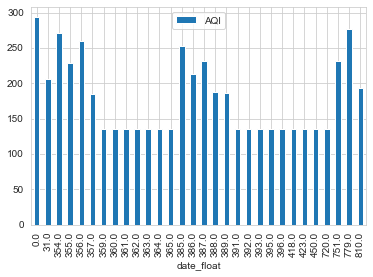

In [70]:
date_wise = pd.pivot_table(maqd, values=['AQI'],index='date_float')
date_wise.loc[:,['AQI']].head(30).plot(kind='bar')

In [71]:
X=maqd.drop(labels = ['AQI', 'date'],axis=1)
y=maqd["AQI"]

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=25, shuffle = True)

# Modelling

## Naive Forecast Approach

In [73]:
NaiveModel_train = pd.concat([X_train, y_train], axis = 1).copy()
NaiveModel_test = pd.concat([X_test, y_test], axis = 1).copy()

In [74]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(y_train)[len(np.asarray(y_train))-1]
NaiveModel_train['naive'].head()

251522    134.0
228754    134.0
220141    134.0
238084    134.0
233129    134.0
Name: naive, dtype: float64

In [75]:
NaiveModel_test['naive'] = np.asarray(y_test)[len(np.asarray(y_test))-1]
NaiveModel_test['naive'].head()

219935    218.0
214493    218.0
213838    218.0
200239    218.0
226846    218.0
Name: naive, dtype: float64

In [76]:
NaiveModel_train = NaiveModel_train.sort_values(by=['date_float'])
NaiveModel_test = NaiveModel_test.sort_values(by=['date_float'])

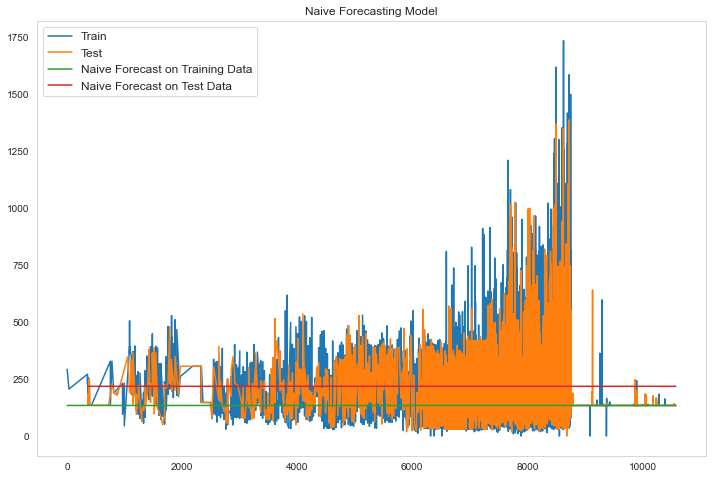

In [77]:
NaiveModel_train_copy = NaiveModel_train
NaiveModel_test_copy = NaiveModel_test
NaiveModel_train_copy = NaiveModel_train_copy.set_index(['date_float']) # to prevent index become timestamp
NaiveModel_test_copy = NaiveModel_test_copy.set_index(['date_float'])

plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_copy['AQI'], label='Train')
plt.plot(NaiveModel_test_copy['AQI'], label='Test')
plt.plot(NaiveModel_train_copy['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_copy['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecasting Model")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="large")
plt.grid();

In [78]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, pred): 
    y, pred = np.array(y), np.array(pred)
    try:
        mape =  round(np.sum(np.abs(y - pred)) / np.sum(y) * 100, 6)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [79]:
## Training Data - RMSE and MAPE

naive_rmse_train = metrics.mean_squared_error(y_train, NaiveModel_train['naive'], squared=False)
naive_mape_train = MAPE(y_train,NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(naive_rmse_train, naive_mape_train))

For Naive Model forecast on the Training Data,  RMSE is 94.900 MAPE is 26.29%


In [80]:
## Test Data - RMSE and MAPE

naive_rmse_test = metrics.mean_squared_error(y_test, NaiveModel_test['naive'], squared=False)
naive_mape_test = MAPE(y_test,NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(naive_rmse_test, naive_mape_test))

For Naive Model forecast on the Test Data,  RMSE is 106.576 MAPE is 55.65%


## XGBoost

In [81]:
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xg

In [82]:
xgb = xg.XGBRegressor(seed = 25)

In [83]:
# Search exhaustively for optimal hyperparameters
from sklearn.model_selection import GridSearchCV

# Set up search grid
xgbParam_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(xgb, xgbParam_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}


Based on the exhaustive searching done, the best learning rate is 0.015, best maximum depth is 5 and best number of estimators is 700. We will then used the values from the hyperparameters with the best results for the final calculation.

In [84]:
xgb = xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                      n_estimators  = search.best_params_["n_estimators"],
                      max_depth     = search.best_params_["max_depth"])

xgb.fit(X_train, y_train)
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

print("Training score for using 700 estimators: ", xgb.score(X_train, y_train))
print("Test score for using 700 estimators: ", xgb.score(X_test, y_test))

Training score for using 700 estimators:  0.5108778045514579
Test score for using 700 estimators:  0.49341088967743707


In [85]:
## Training Data - RMSE and MAPE

xgb_rmse_train = metrics.mean_squared_error(y_train, xgb_pred_train,squared=False)
xgb_mape_train = MAPE(y_train, xgb_pred_train)

print("For XGBoost on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(xgb_rmse_train, xgb_mape_train))

For XGBoost on the Training Data,  RMSE is 63.126 MAPE is 17.36%


In [86]:
## Test Data - RMSE and MAPE

xgb_rmse_test = metrics.mean_squared_error(y_test, xgb_pred_test, squared=False)
xgb_mape_test = MAPE(y_test, xgb_pred_test)

print("For XGBoost on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(xgb_rmse_test, xgb_mape_test))

For XGBoost on the Test Data,  RMSE is 64.943 MAPE is 18.07%


## Polynomial Regression 

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [88]:
poly = PolynomialFeatures(interaction_only=True)

In [89]:
# Search exhaustively for optimal hyperparameters
# Set up search grid
polyParam_grid = {"degree":    [2, 3, 4]}

# try out every combination of the above values
polySearch = GridSearchCV(poly, polyParam_grid, cv=5, scoring = 'accuracy').fit(X_train, y_train)

print("The best hyperparameters are ", polySearch.best_params_)

The best hyperparameters are  {'degree': 2}


Based on the exhaustive searching done, the best degree is 2.

In [90]:
poly = PolynomialFeatures(degree = polySearch.best_params_["degree"],  interaction_only=True)

poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(poly_train, y_train)
poly_pred_train = poly_clf.predict(poly_train)
poly_pred_test = poly_clf.predict(poly_test)

print("Training score for using ", polySearch.best_params_ ,": ", poly_clf.score(poly_train, y_train))
print("Test score for using ", polySearch.best_params_ ,": ", poly_clf.score(poly_test, y_test))

Training score for using  {'degree': 2} :  0.23047173382576547
Test score for using  {'degree': 2} :  0.22254254024238795


In [91]:
## Training Data - RMSE and MAPE

poly_rmse_train = metrics.mean_squared_error(y_train, poly_pred_train, squared=False)
poly_mape_train = MAPE(y_train, poly_pred_train)

print("For Polynomial Regression on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(poly_rmse_train, poly_mape_train))

For Polynomial Regression on the Training Data,  RMSE is 79.179 MAPE is 26.32%


In [92]:
## Test Data - RMSE and MAPE

poly_rmse_test = metrics.mean_squared_error(y_test, poly_pred_test, squared=False)
poly_mape_test = MAPE(y_test, poly_pred_test)

print("For Polynomial Regression on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(poly_rmse_test, poly_mape_test))

For Polynomial Regression on the Test Data,  RMSE is 80.454 MAPE is 26.66%


## Bagging 

In [93]:
from sklearn.ensemble import BaggingRegressor

In [94]:
bgr = BaggingRegressor (random_state = 25)

In [95]:
# Search exhaustively for optimal hyperparameters
# Set up search grid
bagParam_grid = {"n_estimators":    [9, 10, 11]}

# try out every combination of the above values
bgrSearch = GridSearchCV(bgr, bagParam_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", bgrSearch.best_params_)

The best hyperparameters are  {'n_estimators': 11}


The best hyperparameters determined by the system is using 11 estimators.

In [118]:
bgr = BaggingRegressor(n_estimators = bgrSearch.best_params_["n_estimators"],  random_state = 25)
bgr = bgr.fit(X_train, y_train)

bgr_pred_train = bgr.predict(X_train)
bgr_pred_test = bgr.predict(X_test)

print("Training score for using 11 estimators for training: ", bgr.score(X_train, y_train))
print("Test score for using 11 estimators for testing: ", bgr.score(X_test, y_test))

Training score for using 11 estimators for training:  0.8733182172268512
Test score for using 11 estimators for testing:  0.43977942839194606


In [119]:
## Training Data - RMSE and MAPE

bgr_rmse_train = metrics.mean_squared_error(y_train, bgr_pred_train, squared=False)
bgr_mape_train = MAPE(y_train, bgr_pred_train)

print("For Bagging on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(bgr_rmse_train, bgr_mape_train))

For Bagging on the Training Data,  RMSE is 32.126 MAPE is 7.02%


In [98]:
## Test Data - RMSE and MAPE

bgr_rmse_test = metrics.mean_squared_error(y_test, bgr_pred_test, squared=False)
bgr_mape_test = MAPE(y_test, bgr_pred_test)

print("For Bagging on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(bgr_rmse_test, bgr_mape_test))

For Bagging on the Test Data,  RMSE is 68.295 MAPE is 16.49%


## AdaBoost 

In [99]:
from sklearn.ensemble import AdaBoostRegressor

In [120]:
ada = AdaBoostRegressor (random_state=25) # loss = 'linear' is default

In [121]:
# Search exhaustively for optimal hyperparameters
# Set up search grid
adaParam_grid = {"n_estimators":    [5, 7, 15], 
                "loss": ['exponential', 'linear', 'square']}

# try out every combination of the above values
adaSearch = GridSearchCV(ada, adaParam_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", adaSearch.best_params_)

The best hyperparameters are  {'loss': 'exponential', 'n_estimators': 5}


The best hyperparameters for Adaboost are 5 estimators loss as exponential.

In [125]:
ada = AdaBoostRegressor(n_estimators = adaSearch.best_params_["n_estimators"],  random_state = 25, loss = adaSearch.best_params_["loss"])
ada = ada.fit(X_train, y_train)

ada_pred_train = ada.predict(X_train)
ada_pred_test = ada.predict(X_test)

print("Training score for using 5 estimators for training: ", ada.score(X_train, y_train))
print("Test score for using 5 estimators for testing: ", ada.score(X_test, y_test))

Training score for using 5 estimators for training:  0.16245275234346257
Test score for using 5 estimators for testing:  0.1475817657745806


In [123]:
## Training Data - RMSE and MAPE

ada_rmse_train = metrics.mean_squared_error(y_train, ada_pred_train, squared=False)
ada_mape_train = MAPE(y_train, ada_pred_train)

print("For AdaBoost on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(ada_rmse_train, ada_mape_train))

For AdaBoost on the Training Data,  RMSE is 82.604 MAPE is 26.07%


In [124]:
## Test Data - RMSE and MAPE

ada_rmse_test = metrics.mean_squared_error(y_test, ada_pred_test, squared=False)
ada_mape_test = MAPE(y_test, ada_pred_test)

print("For AdaBoost on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(ada_rmse_test, ada_mape_test))

For AdaBoost on the Test Data,  RMSE is 84.243 MAPE is 26.93%


## Gradient Boosting 

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gdb = GradientBoostingRegressor(random_state=25)

In [107]:
# Search exhaustively for optimal hyperparameters
# Set up search grid
gdbParam_grid = {"n_estimators": [400, 410, 420]}

# try out every combination of the above values
gdbSearch = GridSearchCV(gdb, gdbParam_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ", gdbSearch.best_params_)

The best hyperparameters are  {'n_estimators': 420}


In [108]:
gdb = GradientBoostingRegressor(n_estimators = gdbSearch.best_params_["n_estimators"],  random_state = 25)
gdb = gdb.fit(X_train, y_train)

gdb_pred_train = gdb.predict(X_train)
gdb_pred_test = gdb.predict(X_test)

print("Training score for using 420 estimators for training: ", gdb.score(X_train, y_train))
print("Test score for using 420 estimators for testing: ", gdb.score(X_test, y_test))

Training score for using 420 estimators for training:  0.5151629398035256
Test score for using 420 estimators for testing:  0.49829176702478006


The best number of estimators for Gradient Boosting is 420.

In [109]:
## Training Data - RMSE and MAPE

gdb_rmse_train = metrics.mean_squared_error(y_train, gdb_pred_train, squared=False)
gdb_mape_train = MAPE(y_train, gdb_pred_train)

print("For Gradient Boosting on the Training Data,  RMSE is %3.3f MAPE is %3.2f%%" %(gdb_rmse_train, gdb_mape_train))

For Gradient Boosting on the Training Data,  RMSE is 62.849 MAPE is 17.78%


In [110]:
## Test Data - RMSE and MAPE

gdb_rmse_test = metrics.mean_squared_error(y_test, gdb_pred_test, squared=False)
gdb_mape_test = MAPE(y_test, gdb_pred_test)

print("For Gradient Boosting on the Test Data,  RMSE is %3.3f MAPE is %3.2f%%" %(gdb_rmse_test, gdb_mape_test))

For Gradient Boosting on the Test Data,  RMSE is 64.630 MAPE is 18.51%


# Evaluation

In [111]:
results = pd.DataFrame({'Model': ['Naive Forecasting Approach', 'XGBoost', 'Polynomial Regression', 'Bagging', 'Ada Boost', 'Gradient Boosting'], 
                            'Train RMSE': [naive_rmse_train, xgb_rmse_train, poly_rmse_train, bgr_rmse_train, ada_rmse_train, gdb_rmse_train],
                            'Train MAPE (%)': [naive_mape_train, xgb_mape_train, poly_mape_train, bgr_mape_train, ada_mape_train, gdb_mape_train],
                            'Test RMSE': [naive_rmse_test, xgb_rmse_test, poly_rmse_test, bgr_rmse_test, ada_rmse_test, gdb_rmse_test],
                            'Test MAPE (%)': [naive_mape_test, xgb_mape_test, poly_mape_test, bgr_mape_test, ada_mape_test, gdb_mape_test]})

results

,Model,Train RMSE,Train MAPE (%),Test RMSE,Test MAPE (%)
0,Naive Forecasting Approach,94.900072,26.292662,106.576058,55.650202
1,XGBoost,63.125722,17.361924,64.943410,18.069765
2,Polynomial Regression,79.178991,26.324587,80.453600,26.658234
3,Bagging,32.125860,7.023386,68.294651,16.490143
4,Ada Boost,82.604239,26.066128,84.242943,26.930005
5,Gradient Boosting,62.848596,17.779671,64.629795,18.513641


# Deployment

Based on the results, we have decided to deploy the bagging model.

In [112]:
def predictRes(day, ind, res, sens, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21, l22, l23, l24, l25, l26, l27, l28):
    if(ind == ''):
        ind = 0
    if(res == ''):
        res = 0
    if(sens == ''):
        sens = 0
    if(l1 == ''):
        l1 = 0
    if(l2 == ''):
        l2 = 0
    if(l3 == ''):
        l3 = 0
    if(l4 == ''):
        l4 = 0
    if(l5 == ''):
        l5 = 0
    if(l6 == ''):
        l6 = 0
    if(l7 == ''):
        l7 = 0
    if(l8 == ''):
        l8 = 0
    if(l9 == ''):
        l9 = 0
    if(l10 == ''):
        l10 = 0
    if(l11 == ''):
        l11 = 0
    if(l12 == ''):
        l12 = 0
    if(l13 == ''):
        l13 = 0
    if(l14 == ''):
        l14 = 0
    if(l15 == ''):
        l15 = 0
    if(l16 == ''):
        l16 = 0
    if(l17 == ''):
        l17 = 0
    if(l18 == ''):
        l18 = 0
    if(l19 == ''):
        l19 = 0
    if(l20 == ''):
        l20 = 0
    if(l21 == ''):
        l21 = 0
    if(l22 == ''):
        l22 = 0
    if(l23 == ''):
        l23 = 0
    if(l24 == ''):
        l24 = 0
    if(l25 == ''):
        l25 = 0
    if(l26 == ''):
        l26 = 0
    if(l27 == ''):
        l27 = 0
    if(l28 == ''):
        l28 = 0
    
    prediction = bgr.predict([[day, ind, res, sens, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21, l22, l23, l24, l25, l26, l27, l28]])
    
    return prediction

In [113]:
def displayType():
    print("\n ________________")
    print(" ______Type______")
    print(" 1. Industrial")
    print(" 2. Residential")
    print(" 3. Sensitive")
    print()

In [114]:
def displayLocation():
    print("\n ____________________")
    print(" _____Locations______")
    print(" 1. Akola")
    print(" 2. Amravati")
    print(" 3. Aurangabad")
    print(" 4. Aurangabad(MS)")
    print(" 5. Badlapur")
    print(" 6. Bombay")
    print(" 7. Chandarpur")
    print(" 8. Chandrapur")
    print(" 9. Dombivli")
    print(" 10. Greater Mumbai")
    print(" 11. Jalgaon")
    print(" 12. Jalna")
    print(" 13. Kolhapur")
    print(" 14. Latur")
    print(" 15. Lote")
    print(" 16. Mahad")
    print(" 17. Mumbai")
    print(" 18. Nagpur")
    print(" 19. Nanded")
    print(" 20. Nashik")
    print(" 21. Navi Mumbai")
    print(" 22. Pune")
    print(" 23. Roha")
    print(" 24. Sangli")
    print(" 25. Solapur")
    print(" 26. Tarapur")
    print(" 27. Thane")
    print(" 27. Ulhasnagar")
    print()

In [115]:
import datetime

def convertDateToDays(dateStr):
    
    date = datetime.datetime.strptime(dateStr, '%Y-%m-%d')
    
    return (date - maq['date'].min()) / np.timedelta64(1, 'D')

In [126]:
def main():
    dayValid = False
    typeValid = False
    locationValid = False
    typeArr = [0, 0, 0]
    locArr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    
    #Validate the date entered
    while dayValid == False:
        day = input(" Enter date (yyyy-mm-dd): ")
        try:
            day = float(convertDateToDays(day))
            dayValid = True
        except:
            print(" Incorrect date entered.\n")
    
    #Validate type
    while typeValid == False:
        displayType()
        locType = input(" Enter type: ")
        try:
            locType = int(locType)
            typeValid = True
        except:
            print(" Only integer value can be entered.\n")
    
    if(locType == 1):
        typeArr[0] = 1
    if(locType == 2):
        typeArr[1] = 1
    if(locType == 3):
        typeArr[2] = 1
    
    
    #Validate location
    while locationValid == False:
        displayLocation()
        loc = input(" Enter location: ")
        try:
            loc = int(loc)
            locationValid = True
        except:
            print(" Only integer value can be entered.\n")
    
    if(loc == 1):
        locArr[0] = 1
    if(loc == 2):
        locArr[1] = 1
    if(loc == 3):
        locArr[2] = 1
    if(loc == 4):
        locArr[3] = 1
    if(loc == 5):
        locArr[4] = 1
    if(loc == 6):
        locArr[5] = 1
    if(loc == 7):
        locArr[6] = 1
    if(loc == 8):
        locArr[7] = 1
    if(loc == 9):
        locArr[8] = 1
    if(loc == 10):
        locArr[9] = 1
    if(loc == 11):
        locArr[10] = 1
    if(loc == 12):
        locArr[11] = 1
    if(loc == 13):
        locArr[12] = 1
    if(loc == 14):
        locArr[13] = 1
    if(loc == 15):
        locArr[14] = 1
    if(loc == 16):
        locArr[15] = 1
    if(loc == 17):
        locArr[16] = 1
    if(loc == 18):
        locArr[17] = 1
    if(loc == 19):
        locArr[18] = 1
    if(loc == 20):
        locArr[19] = 1
    if(loc == 21):
        locArr[20] = 1
    if(loc == 22):
        locArr[21] = 1
    if(loc == 23):
        locArr[22] = 1
    if(loc == 24):
        locArr[23] = 1
    if(loc == 25):
        locArr[24] = 1
    if(loc == 26):
        locArr[25] = 1
    if(loc == 27):
        locArr[26] = 1
    if(loc == 28):
        locArr[27] = 1
    
    
    #Predict result
    res = predictRes(day, typeArr[0], typeArr[1], typeArr[2], locArr[0], locArr[1], locArr[2], locArr[3], locArr[4], locArr[5], 
                        locArr[6], locArr[7], locArr[8], locArr[9], locArr[10], locArr[11], locArr[12], locArr[13], locArr[14], locArr[15], 
                        locArr[16], locArr[17], locArr[18], locArr[19], locArr[20], locArr[21], locArr[22], locArr[23], locArr[24], locArr[25], 
                        locArr[26], locArr[27])
    
    print("\n\n ====================================")
    print(" Predicted AQI result: %3.4f" %res)
    print(" ====================================")
    

In [127]:
main()

 Enter date (yyyy-mm-dd): 2023-01-01

 ________________
 ______Type______
 1. Industrial
 2. Residential
 3. Sensitive

 Enter type: 1

 ____________________
 _____Locations______
 1. Akola
 2. Amravati
 3. Aurangabad
 4. Aurangabad(MS)
 5. Badlapur
 6. Bombay
 7. Chandarpur
 8. Chandrapur
 9. Dombivli
 10. Greater Mumbai
 11. Jalgaon
 12. Jalna
 13. Kolhapur
 14. Latur
 15. Lote
 16. Mahad
 17. Mumbai
 18. Nagpur
 19. Nanded
 20. Nashik
 21. Navi Mumbai
 22. Pune
 23. Roha
 24. Sangli
 25. Solapur
 26. Tarapur
 27. Thane
 27. Ulhasnagar

 Enter location: 1


 Predicted AQI result: 134.0000
